In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pathlib import Path
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMAResults
%matplotlib inline

In [46]:
msft = yf.Ticker("MSFT") # api getter
df = msft.history(period = "max")
msft = df 

In [47]:
msft.head().sort_index()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056238,0.064508,0.056238,0.061751,1031788800,0.0,0.0
1986-03-14,0.061751,0.065059,0.061751,0.063956,308160000,0.0,0.0
1986-03-17,0.063956,0.065610,0.063956,0.065059,133171200,0.0,0.0
1986-03-18,0.065059,0.065610,0.062853,0.063405,67766400,0.0,0.0
1986-03-19,0.063405,0.063956,0.061751,0.062302,47894400,0.0,0.0


In [48]:
msft.tail().sort_index()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-26,231.550003,236.710007,231.550003,236.479996,25471700,0.0,0.0
2021-03-29,236.589996,236.800003,231.880005,235.240005,25227500,0.0,0.0
2021-03-30,233.529999,233.850006,231.100006,231.850006,24792000,0.0,0.0
2021-03-31,232.910004,239.100006,232.389999,235.770004,43623500,0.0,0.0
2021-04-01,238.470001,242.839996,238.050003,242.350006,30312000,0.0,0.0


In [49]:
msft = msft.drop(columns = ['Open','High','Low','Volume','Dividends','Stock Splits'])
msft

,Close
Date,
1986-03-13,0.061751
1986-03-14,0.063956
1986-03-17,0.065059
1986-03-18,0.063405
1986-03-19,0.062302
...,...
2021-03-26,236.479996
2021-03-29,235.240005
2021-03-30,231.850006


In [50]:
msft_returns = msft.pct_change()
msft_returns = msft_returns.rename(columns={'Close': "pct_change"})
msft_returns = msft_returns.dropna().copy()
msft_returns.head(20)

,pct_change
Date,
1986-03-14,0.035713
1986-03-17,0.017250
1986-03-18,-0.025432
1986-03-19,-0.017391
1986-03-20,-0.026547
1986-03-21,-0.027271
1986-03-24,-0.028035
1986-03-25,0.019229
1986-03-26,0.028300


<AxesSubplot:title={'center':'Close Price'}, xlabel='Date'>

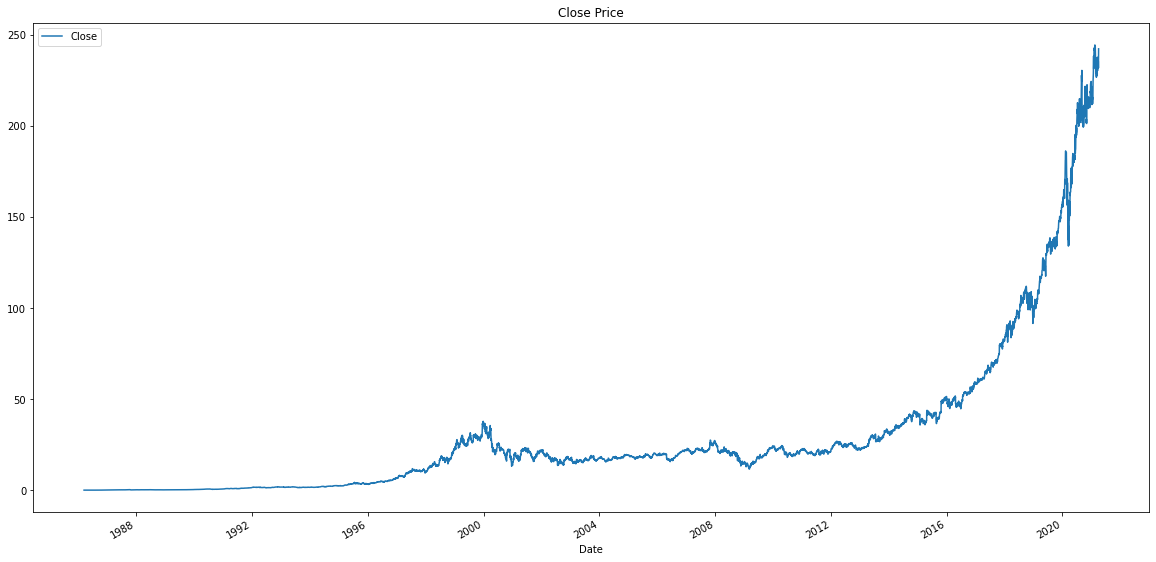

In [51]:
msft.plot(figsize=(20, 10), title="Close Price")

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

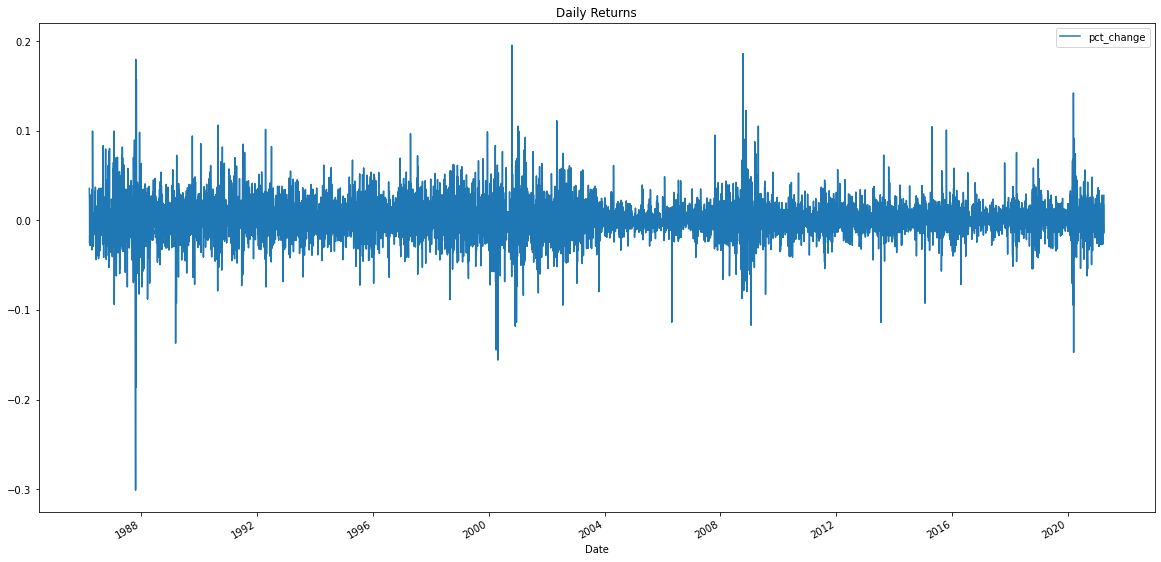

In [52]:
msft_returns.plot(figsize=(20,10), title="Daily Returns")

In [53]:
import statsmodels.api as sm

In [54]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(msft["Close"])

In [55]:
returns_decomp = msft[["Close"]].copy()
returns_decomp['noise'] = ts_noise
returns_decomp['trend'] = ts_trend
returns_decomp.head()

,Close,noise,trend
Date,,,
1986-03-13,0.061751,0.000344,0.061407
1986-03-14,0.063956,0.002647,0.061308
1986-03-17,0.065059,0.003849,0.061210
1986-03-18,0.063405,0.002290,0.061114
1986-03-19,0.062302,0.001277,0.061025


<AxesSubplot:title={'center':'Settle vs Trend'}, xlabel='Date'>

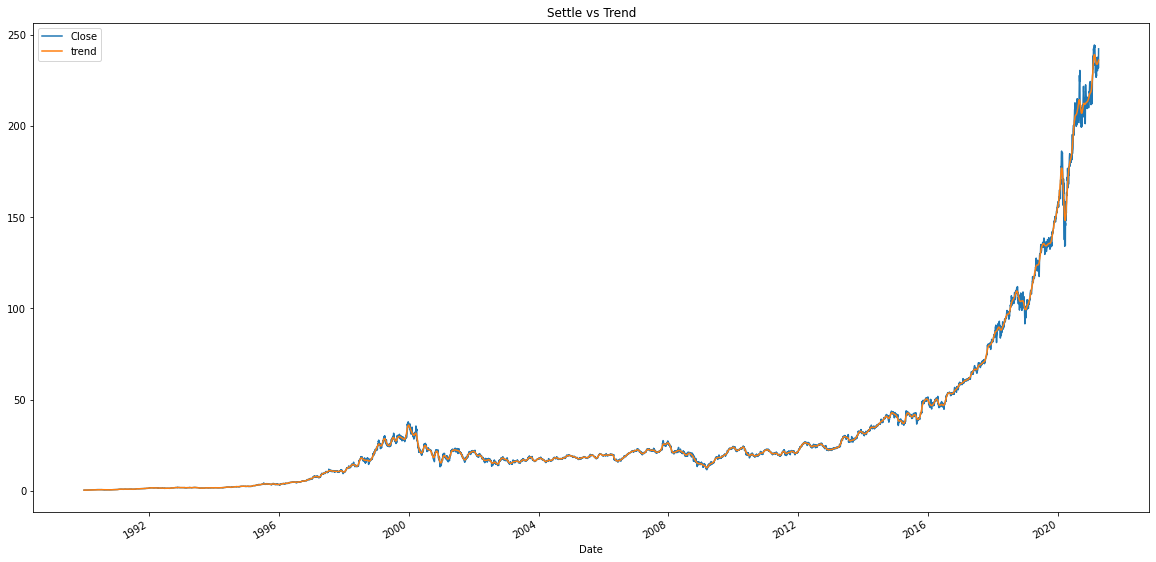

In [56]:
returns_decomp[['Close','trend']]['1990-01-01':].plot(figsize=(20,10), title="Settle vs Trend")

<AxesSubplot:title={'center':'Settle vs Noise'}, xlabel='Date'>

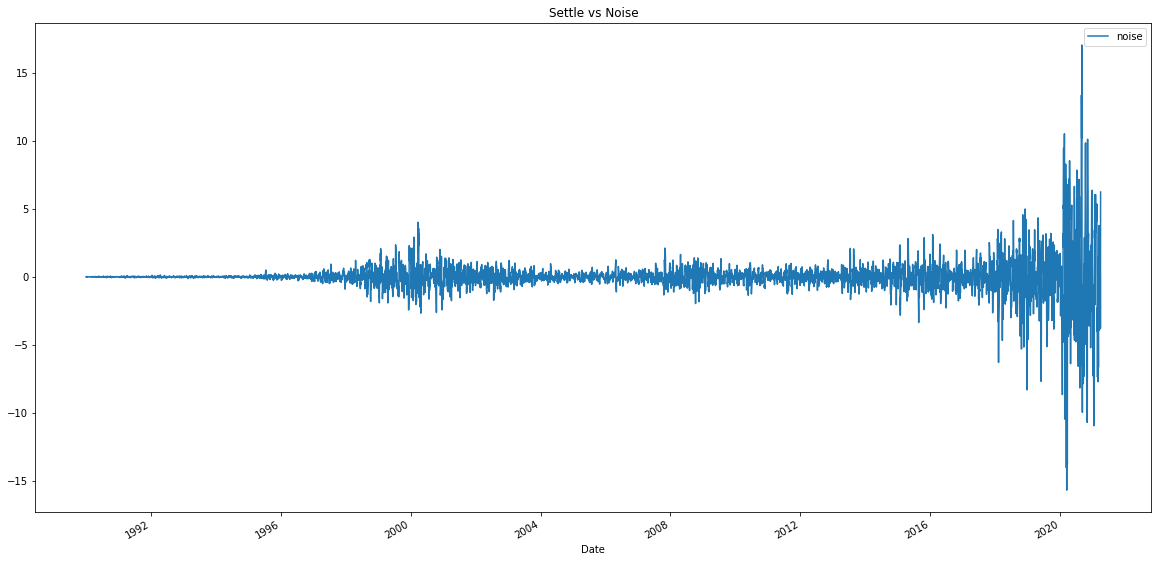

In [57]:
returns_decomp[['noise']]['1990-01-01':].plot(figsize=(20,10), title="Settle vs Noise")

In [166]:
from statsmodels.tsa.stattools import adfuller
adfuller(msft)

ValueError: x is required to have ndim 1 but has ndim 2

In [167]:
msft['Returns'] = msft.Close.pct_change() * 100
msft['Diff'] = msft.Close.diff()
msft = msft.dropna()
msft.head()

# split into test training data
X_train = msft['Returns'].iloc[0:7068]
X_test = msft['Returns'].iloc[7069:]

<ipython-input-167-ca245fed2fe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft['Returns'] = msft.Close.pct_change() * 100
<ipython-input-167-ca245fed2fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft['Diff'] = msft.Close.diff()


In [168]:
msft

,Close,Returns,Diff
Date,,,
1986-03-18,0.063405,-2.543161,-0.001655
1986-03-19,0.062302,-1.739057,-0.001103
1986-03-20,0.060648,-2.654675,-0.001654
1986-03-21,0.058994,-2.727101,-0.001654
1986-03-24,0.057340,-2.803531,-0.001654
...,...,...,...
2021-03-26,236.479996,1.781871,4.139999
2021-03-29,235.240005,-0.524353,-1.239990
2021-03-30,231.850006,-1.441081,-3.389999


In [169]:
X_train

Date
1986-03-18   -2.543161
1986-03-19   -1.739057
1986-03-20   -2.654675
1986-03-21   -2.727101
1986-03-24   -2.803531
                ...   
2014-03-24    0.846650
2014-03-25   -0.395084
2014-03-26   -1.363414
2014-03-27   -1.080667
2014-03-28    2.388182
Name: Returns, Length: 7068, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

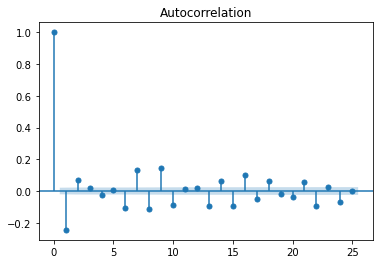

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(msft['Diff'], lags = 25)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

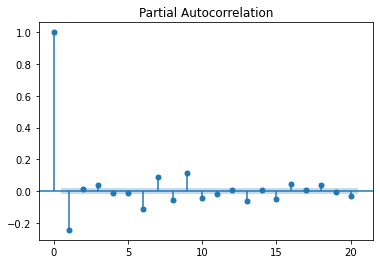

In [171]:
plot_pacf(msft['Diff'], lags = 20)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

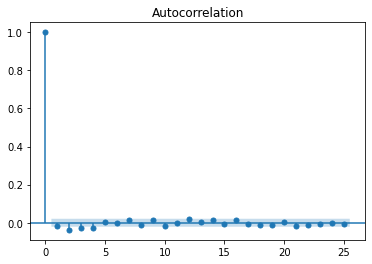

In [172]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(msft['Returns'], lags = 25)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

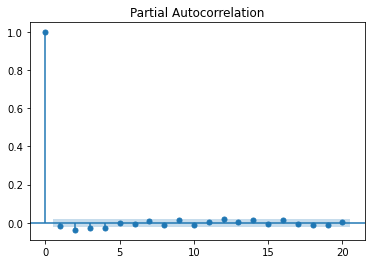

In [173]:
plot_pacf(msft['Returns'], lags = 20)
pyplot.show

In [174]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(X_train, order=(2,1,1))
results = model.fit()

/Users/maxalbanese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxalbanese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided

In [175]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                 7067
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15736.840
Method:                       css-mle   S.D. of innovations              2.242
Date:                Fri, 02 Apr 2021   AIC                          31483.680
Time:                        22:10:41   BIC                          31517.996
Sample:                             1   HQIC                         31495.499
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.575e-05   1.26e-05     -2.829      0.005   -6.05e-05    -1.1e-05
ar.L1.D.Returns     0.0057      0.012      0.483      0.629      -0.018       0.029
ar.L2.D.Returns    -0.0479      0.012     -4.031      0.000      -0.071      -0.025
ma.L1.D.Returns    -0.9999      0.000  -2224.677      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0599           -4.5686j            4.5690           -0.2479
AR.2            0.0599           +4.5686j            4.5690            0.2479
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [79]:
history = [x for x in X_train]

predictions = []

n_X_test = len(X_test)

for i in list(X_test.index):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    true_test_value = X_test[i]
    history.append(true_test_value)
MAE = mean_absolute_error(X_test, predictions)
print("testing mean squared error is {}".format(MAE))

%store predictions

/Users/maxalbanese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxalbanese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARM

testing mean squared error is 1.116842923442075
Stored 'predictions' (list)


In [149]:
print("testing MAE is {}".format(MAE))

testing MAE is 1.116842923442075


<AxesSubplot:>

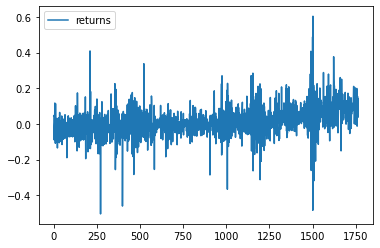

In [176]:
results = pd.DataFrame(predictions, columns = ['returns'])
results.plot()

In [205]:
test = pd.DataFrame(X_test)
test = test.reset_index()
df = pd.concat([results, test],axis=1, join='inner')

In [206]:
df = df.set_index("Date")

<AxesSubplot:xlabel='Date'>

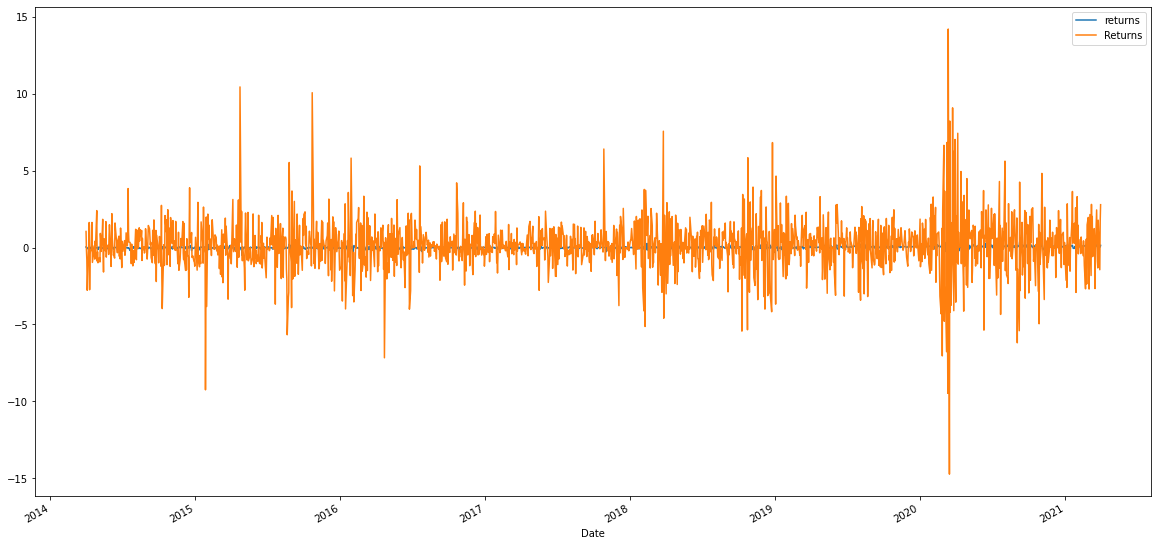

In [215]:
df.plot(figsize=(20,10))